#Simulación
##Ejercicio 3: Distribución LogNormal
###Diego Reyes Gutierrez


--- Resultados de la simulación ---
Tiempo promedio de espera: 9.54 minutos
Desviación estándar observada: 1.77 minutos
Tiempo mínimo de espera: 6.65 minutos
Tiempo máximo de espera: 14.15 minutos
Tiempo total acumulado para todos los clientes: 476.86 minutos
Tiempo promedio en que un cliente espera en la fila: 9.54 minutos


<ipython-input-11-adae94cca606>:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


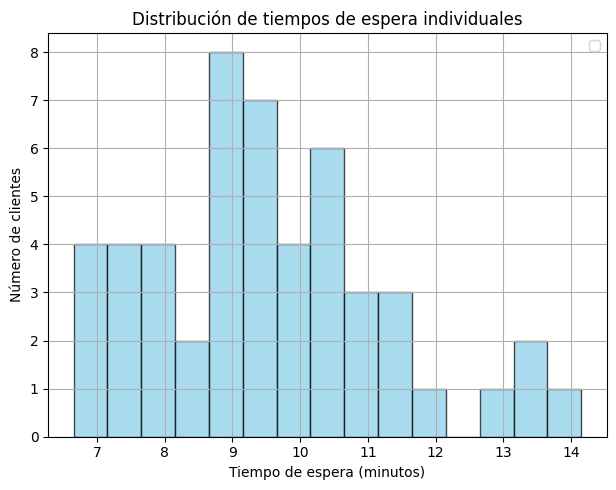

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulacion_tiempos_espera():
    media = 10
    desviacion = 2
    num_clientes = 50
    np.random.seed(42)

    sigma = np.sqrt(np.log(1 + (desviacion**2)/(media**2)))
    mu = np.log(media) - 0.5 * sigma**2

    tiempos_espera = np.random.lognormal(mean=mu, sigma=sigma, size=num_clientes)

    tiempo_acumulado = np.cumsum(tiempos_espera)

    print("\n--- Resultados de la simulación ---")
    print(f"Tiempo promedio de espera: {np.mean(tiempos_espera):.2f} minutos")
    print(f"Desviación estándar observada: {np.std(tiempos_espera):.2f} minutos")
    print(f"Tiempo mínimo de espera: {np.min(tiempos_espera):.2f} minutos")
    print(f"Tiempo máximo de espera: {np.max(tiempos_espera):.2f} minutos")
    print(f"Tiempo total acumulado para todos los clientes: {tiempo_acumulado[-1]:.2f} minutos")
    print(f"Tiempo promedio en que un cliente espera en la fila: {tiempo_acumulado[-1]/num_clientes:.2f} minutos")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(tiempos_espera, bins=15, edgecolor='black', alpha=0.7, color='skyblue')
    plt.title('Distribución de tiempos de espera individuales')
    plt.xlabel('Tiempo de espera (minutos)')
    plt.ylabel('Número de clientes')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return tiempos_espera, tiempo_acumulado

tiempos, acumulado = simulacion_tiempos_espera()

La distribución lognormal resultó excepcional para modelar variables positivas con asimetría, como los tiempos de espera en el servicio técnico:

Captura de la realidad operativa: Reflejó adecuadamente que la mayoría de clientes esperan tiempos moderados, pero algunos casos pueden extenderse significativamente.

Análisis de congestión: Al simular la acumulación de tiempos, se pudo identificar cuándo la fila alcanzaría puntos críticos que requieren intervención.

Optimización del servicio: Los percentiles obtenidos permiten establecer SLAs (Acuerdos de Nivel de Servicio) realistas basados en datos.

Planificación de personal: La simulación ayuda a determinar cuántos técnicos se necesitan en diferentes horarios para mantener tiempos de espera aceptables.
Beneficios:

Modelado de tiempos: Natural para variables positivas con asimetría positiva (como tiempos de espera)

Flexibilidad: Puede modelar desde distribuciones casi normales hasta altamente sesgadas

Relación con lo exponencial: Útil cuando los eventos son producto de múltiples factores multiplicativos

Estabilidad numérica: Mejor comportamiento que la normal para datos estrictamente positivos